# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [76]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [78]:
plans.head() # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [79]:
users.head() # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [80]:
usage.head() # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [81]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [82]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [83]:
users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [84]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [85]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos
print(users.isna().mean()) # Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [86]:
# cantidad de nulos para usage
print(usage.isna().sum()) # Cantidad de valores nulos
print(usage.isna().mean()) # Proporción de valores nulos

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Dataset - users:**

1) city (11.73% nulos)
→ Proporción moderada; se puede imputar como "Unknown" o mantener nulos según el nivel de análisis geográfico requerido.

2) churn_date (88.35% nulos)
→ Nulos esperados por definición del negocio (usuarios activos); no se imputan ni eliminan.

**Dataset - usage:**

1) date (0.125% nulos)
→ Proporción insignificante; se puede imputar (por ejemplo, forward fill) o excluir sin impacto relevante.

2) duration (55.19% nulos)
→ Proporción muy alta; se recomienda excluir del análisis principal o analizar solo para ciertos type donde tenga sentido.

3) length (44.74% nulos)
→ Proporción elevada; investigar relación con type y decidir imputación condicional o exclusión.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [87]:
# explorar columnas numéricas de users
users[['user_id']].describe()

,user_id
count,4000.000000
mean,11999.500000
std,1154.844867
min,10000.000000
25%,10999.750000
50%,11999.500000
75%,12999.250000
max,13999.000000


In [88]:
users[['age']].describe()

,age
count,4000.000000
mean,33.739750
std,123.232257
min,-999.000000
25%,32.000000
50%,47.000000
75%,63.000000
max,79.000000


**- La columna `user_id`:**

  1) Hay 4,000 valores, sin nulos.
  
  2) Los valores van de 10,000 a 13,999, lo que indica un ID secuencial y controlado.
  
  3) La media y la mediana (11,999.5) coinciden, lo que sugiere distribución uniforme.
  
  4) La desviación estándar es consistente con un rango continuo de IDs.
  
Conclusión: user_id es un identificador, no una variable numérica analítica; no debe usarse para cálculos estadísticos ni modelos predictivos.
  
**- La columna `age`:**

  1) Existen 4,000 registros sin nulos, pero con valores inválidos.
  
  2) El valor mínimo (-999) indica un placeholder de datos faltantes, no una edad real.
  
  3) La desviación estándar extremadamente alta (123) es una señal clara de datos atípicos artificiales.
  
  4) La media (33.7) es inconsistente con la mediana (47), lo que confirma distorsión por valores erróneos.

Conclusión: age requiere limpieza previa (reemplazar -999 por la mediana de age) antes de cualquier análisis estadístico o modelado.

In [89]:
# explorar columnas numéricas de usage
usage[['id']].describe()

,id
count,40000.00000
mean,20000.50000
std,11547.14972
min,1.00000
25%,10000.75000
50%,20000.50000
75%,30000.25000
max,40000.00000


In [90]:
usage[['user_id']].describe()

,user_id
count,40000.000000
mean,12002.405975
std,1157.279564
min,10000.000000
25%,10996.000000
50%,12013.000000
75%,13005.000000
max,13999.000000


**- La columna `id`:**

1) Hay 40,000 reminder registros, sin valores nulos.

2) Los valores van de 1 a 40,000, lo que indica un identificador secuencial.

3) La media y la mediana (20,000.5) coinciden, reflejando una distribución uniforme.

4) La desviación estándar es consistente con un rango continuo de IDs.

 Conclusión: id es un identificador técnico, no una variable analítica; debe excluirse de cálculos estadísticos y modelos.

**- La columna `user_id`:** 

1) Hay 40,000 registros, sin valores nulos.

2) Los valores se concentran entre 10,000 y 13,999, lo que indica un identificador numérico controlado.

3) La media (12,002.4) y la mediana (12,013) son muy cercanas, consistente con una asignación casi uniforme.

4) La desviación estándar es coherente con un rango fijo de IDs y no refleja variabilidad de negocio.

Conclusión: user_id es un identificador de usuario, no una variable analítica; debe usarse solo para joins y trazabilidad, no para análisis estadístico.


In [91]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

In [92]:
users[['city']].value_counts()

city    
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
dtype: int64

In [93]:
users[['plan']].value_counts()

plan   
Basico     2595
Premium    1405
dtype: int64

**- La columna `city`:**

1) Es una variable categórica con 7 categorías.

2) Bogotá y CDMX concentran la mayor cantidad de usuarios, seguidas por Medellín, GDL, Cali y MTY.

3) Existe una categoría “?” (96 registros) que representa ciudad desconocida o dato mal capturado (~2.4% del total).

Conclusión: la columna es usable para análisis geográfico, pero conviene recodificar “?” por valores nulos (NA) para mantener consistencia y calidad de datos.

**- La columna `plan`:**

1) Es una variable categórica binaria con dos planes: Básico y Premium.

2) La mayoría de los usuarios están en el plan Básico (2,595; ~65%), frente a Premium (1,405; ~35%).

3) No se observan valores nulos ni categorías inválidas.

Conclusión: plan es una variable clave de segmentación y está limpia; puede usarse directamente para análisis de comportamiento, ingresos y churn.


In [94]:
# explorar columna categórica de usage
usage['type'].value_counts() # completa el código

text    22092
call    17908
Name: type, dtype: int64


**- La columna `type`:**

1) Es una variable categórica binaria con dos tipos de uso: text y call.

2) El uso de text (22,092 registros) es mayor que call (17,908 registros), lo que sugiere mayor preferencia por mensajería.

3) No se observan valores nulos ni categorías inconsistentes.

Conclusión: type es una variable operacional clave, adecuada para segmentar patrones de uso y explicar diferencias en métricas como duración, frecuencia y consumo.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

**USERS:**

**- La columna `user_id`:**

  1) Hay 4,000 valores, sin nulos.
  
  2) Los valores van de 10,000 a 13,999, lo que indica un ID secuencial y controlado.
  
  3) La media y la mediana (11,999.5) coinciden, lo que sugiere distribución uniforme.
  
  4) La desviación estándar es consistente con un rango continuo de IDs.
  
Conclusión: user_id es un identificador, no una variable numérica analítica; no debe usarse para cálculos estadísticos ni modelos predictivos.
  
**- La columna `age`:**

  1) Existen 4,000 registros sin nulos, pero con valores inválidos.
  
  2) El valor mínimo (-999) indica un placeholder de datos faltantes, no una edad real. **Sentinel**
  
  3) La desviación estándar extremadamente alta (123) es una señal clara de datos atípicos artificiales.
  
  4) La media (33.7) es inconsistente con la mediana (47), lo que confirma distorsión por valores erróneos.

Conclusión: age requiere limpieza previa (reemplazar -999 por la mediana de age) antes de cualquier análisis estadístico o modelado. **Acción sentinel**

**- La columna `city`:** 

1) Es una variable categórica con 7 categorías.

2) Bogotá y CDMX concentran la mayor cantidad de usuarios, seguidas por Medellín, GDL, Cali y MTY.

3) Existe una categoría “?” (96 registros) que representa ciudad desconocida o dato mal capturado (~2.4% del total). **Sentinel**

Conclusión: la columna es usable para análisis geográfico, pero conviene recodificar “?” por valores nulos (NA) para mantener consistencia y calidad de datos. **Acción sentinel**

**- La columna `plan`:**

1) Es una variable categórica binaria con dos planes: Básico y Premium.

2) La mayoría de los usuarios están en el plan Básico (2,595; ~65%), frente a Premium (1,405; ~35%).

3) No se observan valores nulos ni categorías inválidas.

Conclusión: plan es una variable clave de segmentación y está limpia; puede usarse directamente para análisis de comportamiento, ingresos y churn.


**USAGE:**

**- La columna `id`:**

1) Hay 40,000 reminder registros, sin valores nulos.

2) Los valores van de 1 a 40,000, lo que indica un identificador secuencial.

3) La media y la mediana (20,000.5) coinciden, reflejando una distribución uniforme.

4) La desviación estándar es consistente con un rango continuo de IDs.

 Conclusión: id es un identificador técnico, no una variable analítica; debe excluirse de cálculos estadísticos y modelos.

**- La columna `user_id`:** 

1) Hay 40,000 registros, sin valores nulos.

2) Los valores se concentran entre 10,000 y 13,999, lo que indica un identificador numérico controlado.

3) La media (12,002.4) y la mediana (12,013) son muy cercanas, consistente con una asignación casi uniforme.

4) La desviación estándar es coherente con un rango fijo de IDs y no refleja variabilidad de negocio.

Conclusión: user_id es un identificador de usuario, no una variable analítica; debe usarse solo para joins y trazabilidad, no para análisis estadístico.

**- La columna `type`:**

1) Es una variable categórica binaria con dos tipos de uso: text y call.

2) El uso de text (22,092 registros) es mayor que call (17,908 registros), lo que sugiere mayor preferencia por mensajería.

3) No se observan valores nulos ni categorías inconsistentes.

Conclusión: type es una variable operacional clave, adecuada para segmentar patrones de uso y explicar diferencias en métricas como duración, frecuencia y consumo.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [95]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors="coerce", utc=True) # completa el código


In [96]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce", utc=True) # completa el código

In [97]:
# Revisar los años presentes en `reg_date` de users
users[['reg_date']].value_counts()

reg_date                           
2026-05-10 00:00:00+00:00              40
2024-01-01 06:34:17.914478624+00:00     1
2024-01-01 19:42:53.743435864+00:00     1
2024-01-02 02:17:11.657914480+00:00     1
2024-01-02 08:51:29.572393104+00:00     1
                                       ..
2023-01-04 00:17:17.059264816+00:00     1
2023-01-04 06:51:34.973743436+00:00     1
2023-01-04 13:25:52.888222056+00:00     1
2023-01-04 20:00:10.802700676+00:00     1
2023-07-04 13:17:14.358589648+00:00     1
Length: 3961, dtype: int64

En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

1) Es una variable temporal (timestamp con zona UTC).

2) Existen 3,961 valores únicos para 4,000 usuarios, lo que indica que la mayoría de registros son únicos.

3) Se observa un valor atípico: 2026-05-10 con 40 repeticiones, lo cual es inconsistente frente al resto de fechas (probable error de carga o fecha por defecto).

4) El resto de las fechas se distribuyen principalmente entre 2023 y 2024, con granularidad a nivel de segundos/nanosegundos.

Conclusión: reg_date es analíticamente valiosa, pero requiere validación y corrección del outlier (2026-05-10) antes de análisis de cohortes o antigüedad de usuario por lo que hay marcar como nulo (NA).

In [98]:
# Revisar los años presentes en `date` de usage
usage[['date']].value_counts()

date                               
2024-01-01 00:00:00+00:00              1
2024-04-30 16:32:34.848871220+00:00    1
2024-04-30 15:46:58.060451510+00:00    1
2024-04-30 15:53:29.030225754+00:00    1
2024-04-30 16:00:00+00:00              1
                                      ..
2024-03-01 07:46:58.060451511+00:00    1
2024-03-01 07:53:29.030225755+00:00    1
2024-03-01 08:00:00+00:00              1
2024-03-01 08:06:30.969774244+00:00    1
2024-06-30 00:00:00+00:00              1
Length: 39950, dtype: int64

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

1) Es una variable temporal con timestamp en UTC.

2) Existen 39,950 valores únicos sobre 40,000 registros, lo que indica alta granularidad temporal y muy pocos duplicados.

3) Las fechas se concentran en 2024, con registros distribuidos a lo largo de varios meses y horas.

4) No se aprecian valores dominantes ni patrones de error evidentes.

Conclusión: date es una columna temporal limpia y confiable, adecuada para análisis de series de tiempo, patrones de uso diarios y agregaciones por periodo.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

**Los años presentes en `reg_date` de users:**

1) Es una variable temporal (timestamp con zona UTC).

2) Existen 3,961 valores únicos para 4,000 usuarios, lo que indica que la mayoría de registros son únicos.

3) **Se observa un valor atípico: 2026-05-10 con 40 repeticiones, lo cual es inconsistente frente al resto de fechas (probable error de carga o fecha por defecto).**

4) **El resto de las fechas se distribuyen principalmente entre 2023 y 2024, con granularidad a nivel de segundos/nanosegundos.**

**ACCIÓN - Conclusión: reg_date es analíticamente valiosa, pero requiere validación y corrección del outlier (2026-05-10) antes de análisis de cohortes o antigüedad de usuario por lo que hay marcar como nulo (NA). Eliminar las fechas con año 2023 o Filtrar las fechas con año 2024**

**Los años presentes en `date` de usage:**

1) Es una variable temporal con timestamp en UTC.

2) Existen 39,950 valores únicos sobre 40,000 registros, lo que indica alta granularidad temporal y muy pocos duplicados.

3) Las fechas se concentran en 2024, con registros distribuidos a lo largo de varios meses y horas.

4) No se aprecian valores dominantes ni patrones de error evidentes.

Conclusión: date es una columna temporal limpia y confiable, adecuada para análisis de series de tiempo, patrones de uso diarios y agregaciones por periodo.


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [99]:
# Calcular la mediana de age
age_mediana = users['age'].median()
print(age_mediana)

47.0


In [100]:
# Reemplazar -999 por la mediana de age
users['age'] = users['age'].replace(-999, age_mediana) 

In [101]:
# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [102]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA) 

# Verificar cambios
users['city'].head()

0    Medellín
1        <NA>
2        CDMX
3      Bogotá
4         GDL
Name: city, dtype: object

In [103]:
# Verificar el tipo de dato de la columna
print("Tipo de dato:", users['reg_date'].dtype)

# Ver los valores únicos que contienen '2026'
future_dates = users[users['reg_date'].astype(str).str.contains('2026', na=False)]
print("Fechas futuras encontradas:")
print(future_dates['reg_date'].unique())

# Ver el tipo exacto del primer valor futuro
if len(future_dates) > 0:
    first_future = future_dates['reg_date'].iloc[0]
    print(f"Primer valor futuro: {repr(first_future)}")
    print(f"Tipo: {type(first_future)}")

Tipo de dato: datetime64[ns, UTC]
Fechas futuras encontradas:
<DatetimeArray>
['2026-05-10 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]
Primer valor futuro: Timestamp('2026-05-10 00:00:00+0000', tz='UTC')
Tipo: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [104]:
# Marcar fechas futuras como NA para reg_date
# Crear máscara para fechas futuras (2026)
mask = users['reg_date'].dt.year == 2026
users.loc[mask, 'reg_date'] = pd.NaT

In [105]:
# Verificar cambios
users['reg_date'].value_counts()

2023-12-20 18:33:45.506376600+00:00    1
2024-12-31 00:00:00+00:00              1
2024-09-19 14:12:19.984996256+00:00    1
2024-06-20 09:50:54.463615904+00:00    1
2022-05-22 00:23:45.956489122+00:00    1
                                      ..
2022-09-25 05:55:24.531132784+00:00    1
2022-07-29 04:44:06.661665416+00:00    1
2022-02-22 00:36:43.750937734+00:00    1
2022-10-31 09:22:49.242310580+00:00    1
2022-03-28 12:38:20.975243811+00:00    1
Name: reg_date, Length: 3960, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [106]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean().sort_values(ascending=False)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [107]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean().sort_values(ascending=False)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

**Nulos duration:**

A partir de la información visualizada, la evidencia apunta a que los nulos en duration sí son MAR (Missing At Random) condicionados por la variable type.

*Análisis*

La proporción de nulos en duration por categoría de type, obteniendo:

type = text → 99.93% nulos

type = call → 0% nulos

En términos prácticos:

Para llamadas (call), la duración es una métrica relevante y siempre está presente.

Para mensajes de texto (text), la duración no aplica conceptualmente, por lo que aparece como nula casi en su totalidad.

Esto cumple la definición de MAR:

La probabilidad de que duration sea nula depende de una variable observada (type), y no del valor no observado de duration en sí.

*Conclusión*

Los nulos en duration son MAR condicionados por type.

Se dejan como nulos, ya que representan correctamente la naturaleza del dato y preservan la integridad analítica del dataset.

**Nulos length:**

A partir de la información visualizada, la evidencia apunta a que los nulos en duration sí son MAR (Missing At Random) condicionados por la variable type.

*Análisis*

La proporción de valores nulos en length por categoría de type es:

type = call → 99.93% nulos

type = text → 0% nulos

En terminos prácticos:

Para registros de call, la variable relevante es típicamente duration, no length.

Para registros de text, length (número de caracteres) sí aplica y está completamente informada.

Por lo tanto, los nulos en length aparecen cuando el campo no es conceptualmente aplicable, no por errores de captura.

*Conclusión*

Los valores faltantes en length son MAR condicionados por type y reflejan correctamente la lógica del dominio.
Se mantienen como nulos, ya que cualquier imputación degradaría la calidad y la interpretación del dato.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [108]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby(['user_id'])[['is_text', 'is_call','duration']].agg(["sum"]).sort_values(by=['user_id'],ascending=True).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
,,sum,sum,sum
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [109]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   id        40000 non-null  int64              
 1   user_id   40000 non-null  int64              
 2   type      40000 non-null  object             
 3   date      39950 non-null  datetime64[ns, UTC]
 4   duration  17924 non-null  float64            
 5   length    22104 non-null  float64            
 6   is_text   40000 non-null  int64              
 7   is_call   40000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [110]:
# Primero agrupar
usage_agg = usage.groupby(['user_id']).agg({
    'is_text': 'sum',      # ¿qué operación necesitas?
    'is_call': 'sum',      # ¿qué operación necesitas?
    'duration': 'sum'      # ¿qué operación necesitas?
}).reset_index()


# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada',
    })


# observar resultado

usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [111]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users, usage_agg, on=['user_id'], how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00+00:00,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619+00:00,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239+00:00,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858+00:00,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478+00:00,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [112]:
# Resumen estadístico de las columnas numéricas
user_profile[['age','cant_minutos_llamada','cant_mensajes','cant_llamadas']].describe()

,age,cant_minutos_llamada,cant_mensajes,cant_llamadas
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,23.317054,5.524381,4.478120
std,17.690408,18.168095,2.358416,2.144238
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,11.120000,4.000000,3.000000
50%,47.000000,19.780000,5.000000,4.000000
75%,63.000000,31.415000,7.000000,6.000000
max,79.000000,155.690000,17.000000,15.000000


In [113]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

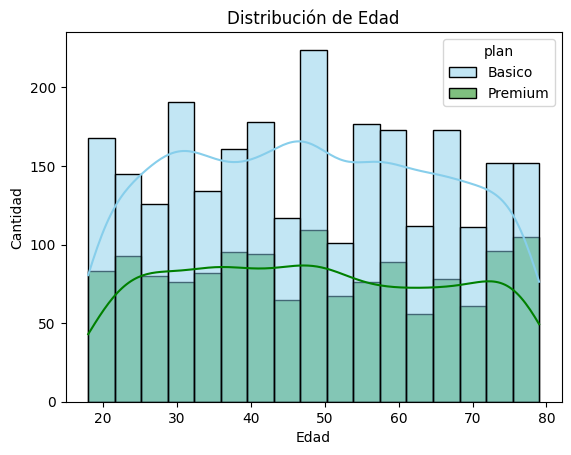

In [114]:
# Histograma para visualizar la edad (age)
# Graficar histograma

sns.histplot(user_profile, x='age', hue='plan', palette=['skyblue','green'], kde=True)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.title("Distribución de Edad")
plt.show()

💡Insights: 
- Distribución ...

**Insights del Plan y Edad:**

Dentro del plan Premium, hay una mayor cantidad absoluta y proporción de usuarios en los rangos de edad más jóvenes (20-30 años) y más mayores (70-80 años), en comparación con el plan Básico dentro de esos mismos grupos de edad.

Los usuarios del plan Básico tienden a concentrarse en las edades intermedias (aproximadamente entre 30 y 70 años), donde la cantidad de usuarios en este plan es consistentemente alta.

El pico de cantidad total de usuarios (suma de ambos planes) ocurre en el rango de edad de 40 a 50 años.

**Tipo de Distribución:**

La distribución general de la edad (sumando ambos planes) es relativamente simétrica, con una ligera asimetría hacia la derecha (sesgada a la derecha). Esto se debe a que la "cola" de la distribución se extiende ligeramente más hacia los valores de edad más altos (80 años).

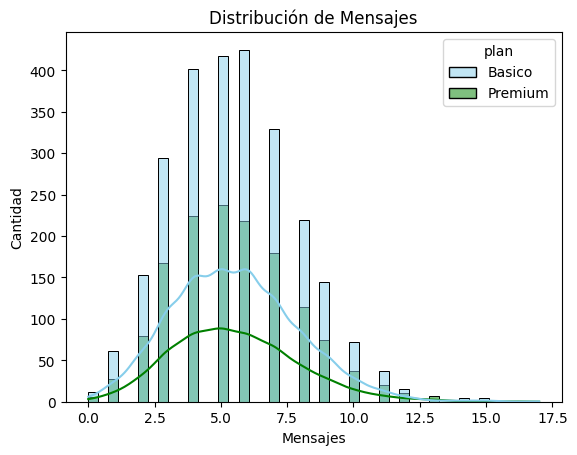

In [115]:
# Histograma para visualizar la cant_mensajes

sns.histplot(user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'], kde=True)
plt.xlabel("Mensajes")
plt.ylabel("Cantidad")
plt.title("Distribución de Mensajes")
plt.show()

💡Insights: 
- ....

**Insights del Plan y Mensajes:**

Dentro del plan Premium, hay una mayor proporción de usuarios que envían un mayor volumen de mensajes, especialmente en los rangos de 5.0 a 7.5 mensajes, donde la porción verde (Premium) es considerablemente grande en comparación con la porción azul claro (Básico).

Los usuarios Básico tienden a concentrarse en volúmenes de mensajes ligeramente inferiores en comparación con los Premium, aunque ambos planes siguen una distribución general similar.

Existe una mayor cantidad total de usuarios en los rangos de 5.0 y 5.5 mensajes.

**Tipo de Distribución:**

La distribución general de la cantidad de mensajes (sumando ambos planes) está sesgada a la derecha. La mayor concentración de usuarios se encuentra en los valores más bajos e intermedios de mensajes (entre 2.5 y 7.5), y la "cola" de la distribución se extiende hacia la derecha (valores más altos de mensajes, hasta 17.5).

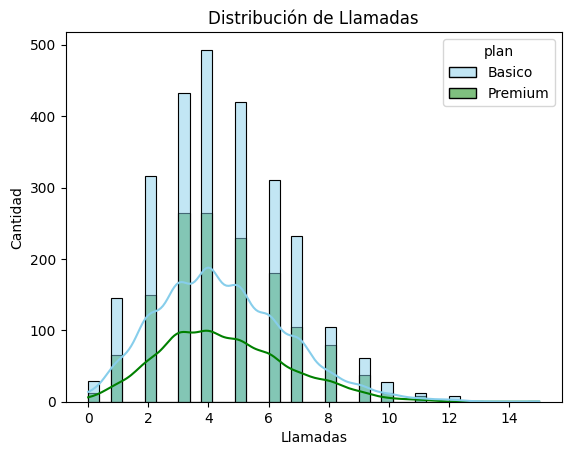

In [116]:
# Histograma para visualizar la cant_llamadas
sns.histplot(user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'], kde=True)
plt.xlabel("Llamadas")
plt.ylabel("Cantidad")
plt.title("Distribución de Llamadas")
plt.show()

💡Insights: 
- Distribución ...

**Insights del Plan y Llamadas:**

Dentro del plan Premium, hay una mayor proporción de usuarios que realizan muy pocas llamadas (0 a 1 llamada), donde casi la totalidad de los usuarios en ese rango pertenecen al plan Premium.

Los usuarios Básico tienden a hacer un mayor número absoluto de llamadas en los rangos intermedios, especialmente entre 4 y 8 llamadas, donde la porción azul claro (Básico) es predominante o sustancial.

El pico de cantidad total de usuarios (suma de ambos planes) ocurre en el rango de 4 llamadas.

**Tipo de Distribución:**
La distribución general de la cantidad de llamadas (sumando ambos planes) está sesgada a la derecha. La mayor concentración de usuarios se encuentra en los valores más bajos e intermedios de llamadas (entre 0 y 8), y la "cola" de la distribución se extiende hacia la derecha (valores más altos de llamadas, hasta 14 o más).

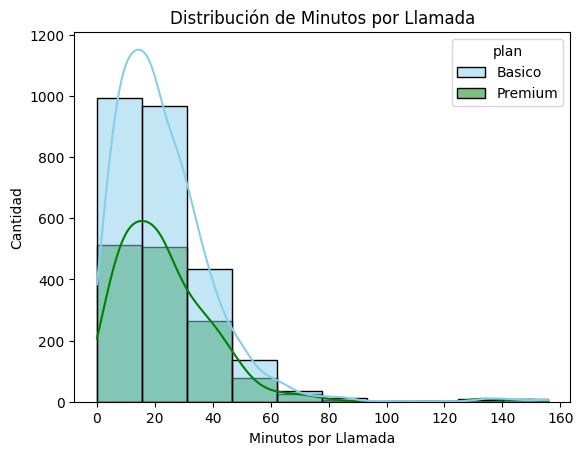

In [117]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(user_profile, x='cant_minutos_llamada', hue='plan', bins= 10 , palette=['skyblue','green'], kde=True)
plt.xlabel("Minutos por Llamada")
plt.ylabel("Cantidad")
plt.title("Distribución de Minutos por Llamada")
plt.show() 

💡Insights: 
- ...

**Insights del Plan y Minutos por Llamada:**

Dentro del plan Premium, hay una mayor proporción de usuarios que realizan llamadas de muy corta duración (entre 0 y 20 minutos), ya que el pico de usuarios para este plan se encuentra en ese rango.

Los usuarios del plan Básico tienden a hacer un mayor número total de llamadas en los rangos intermedios (aproximadamente entre 10 y 50 minutos), donde la cantidad de usuarios en este plan supera a la del plan Premium.

Existe un patrón claro donde ambos planes tienen la mayor concentración de usuarios en llamadas de corta a media duración.

**Tipo de Distribución:**

La distribución general de los minutos por llamada (sumando ambos planes) está sesgada a la derecha. La mayor concentración de usuarios se encuentra en los valores más bajos de minutos (entre 0 y 50), y la "cola" de la distribución se extiende hacia la derecha (valores más altos de minutos, hasta 160).

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

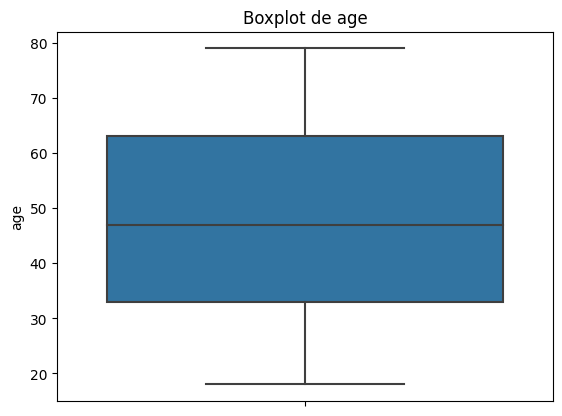

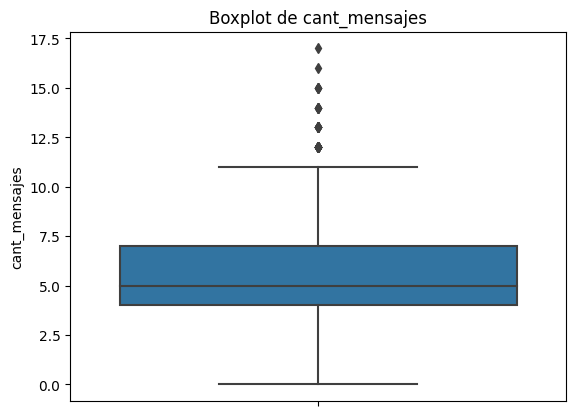

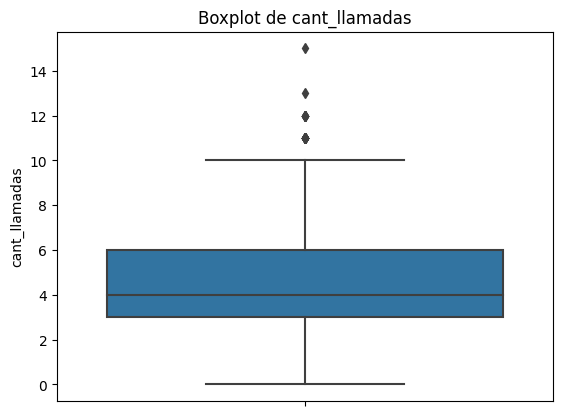

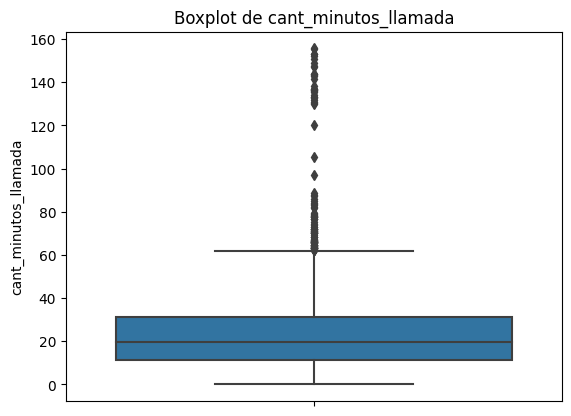

In [118]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure()
    sns.boxplot(data=user_profile, y=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

💡Insights: 
- Age: ...(presenta o no outliers)
- cant_mensajes: ...
- cant_llamadas: ...
- cant_minutos_llamada: ...

**Age:** No presenta outliers. Todos los datos están dentro del rango de los bigotes del diagrama de caja.

**cant_mensajes:** Sí presenta outliers, indicados por puntos individuales por encima del bigote superior.

**cant_llamadas:** Sí presenta outliers, indicados por puntos individuales por encima del bigote superior.

**cant_minutos_llamada:** Sí presenta outliers, indicados por puntos individuales por encima del bigote superior.


In [119]:
# Lista de columnas para analizar
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Diccionario para almacenar resultados
outliers_info = {}

# Bucle para calcular IQR y límite superior
for columna in columnas_limites:
    # Calcular Q1 y Q3
    Q1 = usage_agg[columna].quantile(0.25)
    Q3 = usage_agg[columna].quantile(0.75)
    
    # Calcular IQR
    IQR = Q3 - Q1
    
    # Calcular límite superior
    upper = Q3 + 1.5 * IQR
    
    # Guardar resultados
    outliers_info[columna] = {
        'Q1': Q1,
        'Q3': Q3, 
        'IQR': IQR,
        'limite_superior': upper
    }
    
    print(f"\n{columna}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Límite superior: {upper:.2f}")


cant_mensajes:
  Q1: 4.00
  Q3: 7.00
  IQR: 3.00
  Límite superior: 11.50

cant_llamadas:
  Q1: 3.00
  Q3: 6.00
  IQR: 3.00
  Límite superior: 10.50

cant_minutos_llamada:
  Q1: 11.12
  Q3: 31.41
  IQR: 20.30
  Límite superior: 61.86


In [120]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
- cant_llamadas: mantener o no outliers, porqué?
- cant_minutos_llamada: mantener o no outliers, porqué?

**cant_mensajes:**

*Decisión:* Mantener los outliers (pero analizar su impacto).

*Razón:* El valor máximo (17.00) es superior al límite superior calculado (11.50), lo que confirma su existencia. La decisión de mantenerlos depende del contexto del análisis. 
Generalmente se mantienen si son valores reales y válidos que representan eventos extremos pero posibles (ej. un usuario que envía muchos mensajes en un mes específico). Se podrían eliminar si se demuestra que son errores de registro o valores que sesgan el modelo de forma indeseada.

**cant_llamadas:**

*Decisión:* Mantener los outliers (pero analizar su impacto).

*Razón:* El valor máximo (15.00) es superior al límite superior calculado (10.50), confirmando la presencia de outliers. Al igual que con los mensajes, estos valores pueden representar a un pequeño grupo de usuarios que hacen muchas llamadas reales. Es importante verificar si son valores extremos válidos o errores de entrada de datos antes de tomar una decisión final de eliminación.

**cant_minutos_llamada:**

*Decisión:* Mantener los outliers (pero analizar su impacto).

*Razón:* El valor máximo (155.69) es significativamente superior al límite superior calculado (61.86). Esto indica una presencia notable de llamadas de muy larga duración. Estos valores extremos deben investigarse a fondo, ya que podrían tener un impacto significativo en métricas como la media. Si son datos reales, es probable que se mantengan para reflejar el comportamiento completo del usuario, pero se podría considerar su transformación (ej. winsorización o escalado logarítmico) para reducir su influencia en ciertos modelos estadísticos.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [121]:
# Crear columna grupo_uso basada en condiciones
user_profile["grupo_uso"] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    "Bajo uso",
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
        "Uso medio",
        "Alto uso"
    )
)

In [122]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00+00:00,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619+00:00,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239+00:00,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858+00:00,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478+00:00,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [123]:
# Crear columna grupo_edad basada en condiciones
user_profile["grupo_edad"] = np.where(
    (user_profile['age'] < 30),
    "Joven",
    np.where(
        (user_profile['age'] < 60),
        "Adulto",
        "Adulto Mayor"
    )
)

In [124]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00+00:00,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619+00:00,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239+00:00,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858+00:00,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478+00:00,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

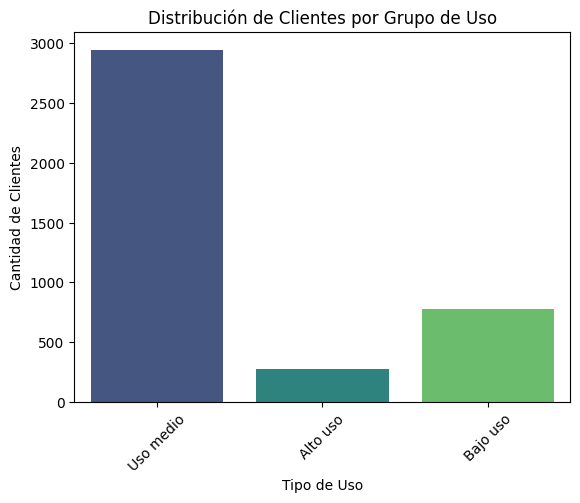

In [125]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis')
plt.title('Distribución de Clientes por Grupo de Uso')
plt.xlabel('Tipo de Uso')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

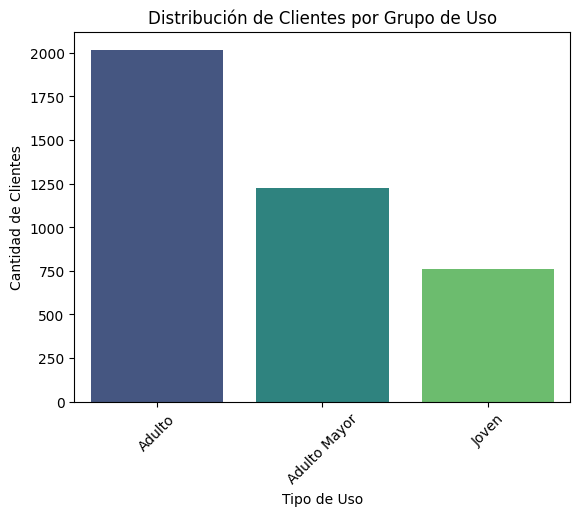

In [126]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad', palette='viridis')
plt.title('Distribución de Clientes por Grupo de Uso')
plt.xlabel('Tipo de Uso')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo – ConnectaTel

⚠️ **Problemas detectados en los datos**

•	Se identificaron valores nulos en variables de uso (mensajes, llamadas y minutos por llamada).

•	Los nulos no estaban distribuidos de forma completamente aleatoria, sino asociados a ciertos tipos de registros (por ejemplo, periodos sin actividad).

•	La proporción de filas afectadas fue acotada y no dominante frente al total del dataset, por lo que no distorsiona los patrones agregados de comportamiento.

•	Dado que los nulos reflejan ausencia real de uso y no errores de captura, se decidió mantenerlos para no introducir sesgos artificiales.

*Implicación para negocio:*

La calidad de los datos es suficiente para análisis estratégico; los nulos representan escenarios reales de bajo o nulo consumo.



🔍 **Segmentos por Edad**

•	No se observa una segmentación clara por edad entre planes Básico y Premium.

•	Ambos planes concentran clientes a lo largo de todo el rango etario analizado.

•	La edad no parece ser el principal driver de la elección del plan.

*Conclusión clave:*

La edad, por sí sola, no es un criterio diferenciador fuerte para diseñar o ajustar planes.



📊 **Segmentos por Nivel de Uso**

A partir del volumen de mensajes, llamadas y minutos por llamada, se identifican tres grandes segmentos operativos:

1.	Usuarios de bajo uso

    -  Menor número de mensajes y llamadas.

    -  Más frecuentes en el plan Premium.

    -  Uso estable y predecible.

2.	Usuarios de uso medio

    -	Consumo regular de mensajes y llamadas.

    -	Presente en ambos planes.

    -	Representan el “core” del negocio.

3.	Usuarios intensivos

    -	Mayor número de mensajes, llamadas y mayor dispersión en minutos por llamada.

    -	Predominan en el plan Básico.

    -	Presentan mayor variabilidad y riesgo de sobreconsumo.


➡️ Esto sugiere que el tipo de plan está más relacionado con el patrón de uso que con variables demográficas.

💎 Segmentos más valiosos para ConnectaTel

•	Los usuarios de uso medio y alto son los más valiosos:

    -  Generan mayor tráfico y potencial ingreso.

    -  Tienen mayor probabilidad de requerir upgrades o add-ons.
        
•	Los usuarios intensivos del plan Básico representan una oportunidad de migración a planes superiores.

*Riesgo identificado:*

Usuarios intensivos en planes básicos pueden generar presión sobre costos sin una monetización proporcional.

🚨 Patrones de uso extremo (outliers)

•	Se detectaron outliers en minutos por llamada y número de llamadas, especialmente en el plan Básico.

•	Estos casos representan:

    -  Uso intensivo concentrado en pocos clientes.

    -  Potenciales abusos del plan o necesidades no cubiertas por la oferta actual.

*Implicación de negocio:*

Estos usuarios pueden erosionar márgenes si no se gestionan adecuadamente.


💡 **Recomendaciones**

1.	Rediseño de planes

    -	Crear un plan intermedio entre Básico y Premium enfocado en usuarios intensivos.
    -	Limitar o tarifar progresivamente el uso extremo.

2.	Estrategias de upsell

    -	Identificar usuarios Básico con consumo alto y ofrecer migración proactiva a Premium.
    -	Comunicación basada en ahorro y estabilidad de costo.

3.	Segmentación por uso (no por edad)

    -	Reorientar la estrategia comercial hacia patrones de consumo reales.
    -	Usar métricas de mensajes, llamadas y duración como ejes de segmentación.

4.	Gestión de outliers

    -	Monitorear usuarios extremos como casos especiales (VIP o riesgo).
    -	Evaluar políticas de fair use.

**Conclusión ejecutiva final:**

El valor para ConnectaTel no está determinado por la edad del cliente, sino por su intensidad y patrón de uso. Optimizar la oferta alrededor de estos segmentos permitirá mejorar rentabilidad, retención y alineación entre consumo y precio.



---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`